# **Spam Mail Detection**
This project aims to classify emails as spam or not spam (ham) using machine learning. It leverages Natural Language Processing (NLP) techniques to extract meaningful features from email text, which are then used to train a Naive Bayes classifier.
##### The project follows a standard machine learning pipeline:
1. **Scoping**: Defining the problem and goals.
2. **The Data**: Loading, exploring, cleaning, and preparing the dataset.
3. **The Model**: Building, training, and evaluating the machine learning model.


## **1. Scoping** 
##### Scoping means defining the boundaries and goals of a project.

#### **Import the necessary libraries**

In [21]:
import pickle #model save/load  
import numpy as np #arrays, math ops  
import pandas as pd #dataframes, csv  
import seaborn as sns #graphs, stats plot  
import matplotlib.pyplot as plt #basic plotting  
import string #handle text chars  
import nltk #text processing
import warnings #suppress warnings  

In [23]:
from pickle import dump #save/load Python objects
from sklearn.feature_extraction.text import CountVectorizer #convert text to vector
from sklearn.model_selection import train_test_split 
from sklearn.naive_bayes import MultinomialNB 
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score 
from nltk.corpus import stopwords 

In [24]:
warnings.simplefilter(action='ignore', category=FutureWarning) #ignore future warnings  
nltk.download('stopwords') #download stopwords list  

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/joelsmathewsj/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

## **2. The Data** 
##### Refers to the raw or processed information used to train, test, or evaluate the model.

 #### **1.Data Loading**

In [25]:
df = pd.read_csv('/Users/joelsmathewsj/Desktop/project/emails.csv') 
print(df.shape)

(5728, 2)


In [4]:
df.head()

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5728 entries, 0 to 5727
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    5728 non-null   object
 1   spam    5728 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 89.6+ KB


In [6]:
df.describe()

,spam
count,5728.000000
mean,0.238827
std,0.426404
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


#### **2.Data Visualization**

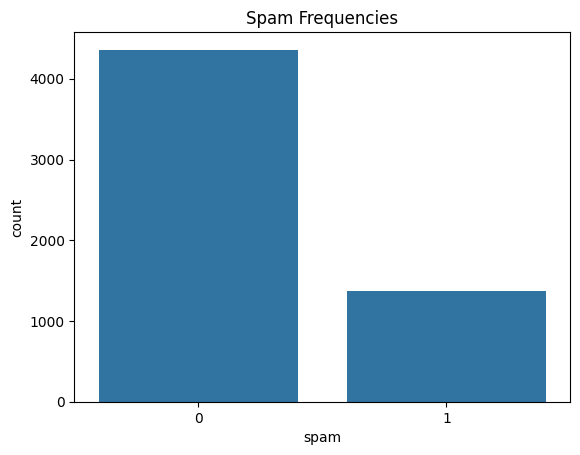

In [7]:
plt.figure(dpi=100)
sns.countplot(x='spam', data=df)
plt.title("Spam Frequencies")
plt.show()

#### **3. Data Cleaning**

In [8]:
print(df.isnull().sum())

text    0
spam    0
dtype: int64


In [11]:
df.drop_duplicates(inplace=True)

In [12]:
def text_process(text):
    no_punc = [char for char in text if char not in string.punctuation] #remove punctuation 
    no_punc = ''.join(no_punc)
    clean_words = [word for word in no_punc.split() if word.lower() not in stopwords.words('english')] #remove stopwords 
    return clean_words

In [13]:
msg_vec = CountVectorizer(analyzer=text_process).fit_transform(df['text']) #vectorize text data 
dump(msg_vec, open("/Users/joelsmathewsj/Desktop/project/models/vectorizer.pkl", "wb")) #save vectorizer to file  

#### **4. Data Splitting**

In [14]:
X_train, X_test, y_train, y_test = train_test_split(msg_vec, df['spam'], test_size=0.20, random_state=0)

In [15]:
model = MultinomialNB()
model.fit(X_train, y_train)
dump(model, open("/Users/joelsmathewsj/Desktop/project/models/model.pkl", 'wb'))

## **3. The Model**

In [16]:
y_pred = model.predict(X_test)

In [17]:
acc = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {acc * 100:.2f}%")

Model Accuracy: 99.21%


In [18]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       870
           1       0.97      1.00      0.98       269

    accuracy                           0.99      1139
   macro avg       0.98      0.99      0.99      1139
weighted avg       0.99      0.99      0.99      1139



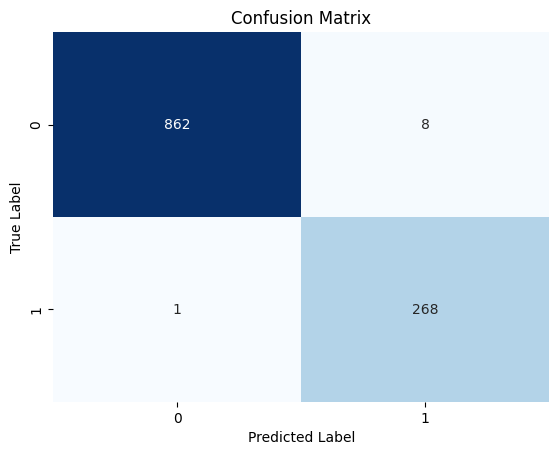

In [20]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(dpi=100)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()